#  Instagram Dataset Description

This dataset contains insights and engagement metrics from Instagram posts.  

### Instagram Dataset Field Description
<hr style="border: 2px dashed white;">
- Below is a description of column fields in the Dataset:
<hr style="border: 2px dashed white;">

#### Core Fileds

- **`Impressions`**: Total number of times the post was seen by users (overall reach).           
- **`From Home`**: Number of impressions that came directly from users’ home feed.             
- **`From Hashtags`**: Impressions generated through hashtags used in the post.                    
- **`From Explore`**: Impressions from the Explore page.
- **`From Other`**: Impressions from other sources (e.g., shares, direct links, profile visits).
- **`Saves`**: Number of times users saved the post.
- **`Comments`**: Total comments received on the post.
-  **`Shares`**: Number of times the post was shared.
-  **`Likes`**: Total likes on the post.
-  **`Profile Visits`** :Number of times users visited the profile after viewing the post.
-  **`Follows`** :Number of new followers gained from the post.
-  **`Caption`** :Text description written for the post.                                     
-  **`Hashtags`** :Hashtags used in the post’s caption.  

### Questions to be answered

1. Is there a relationship between Impressions and Follows?

2. Is there a relationship between total_reach and gaining new Follows?

3. Which variable is a better predictor of follower growth: Impressions or total_reach?

4. Which reach source (Home, Hashtags, Explore, Other) contributes the most to the total impressions?

5. Do frequently used hashtags affect engagement levels such as Likes and Impressions?

6. Do posts with higher-than-average Likes share common patterns in hashtags or reach sources?

7. Is there a relationship between Likes and Shares based on the regression trend?

8. Does higher Profile Visits correlate with a higher number of new Follows?

9. What types of posts generate higher engagement across metrics such as Likes, Comments, and Shares?

10. How do Impressions and Reach influence overall Instagram post performance?

### import libaray

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# load the dataset into pandas Dataframe 

In [7]:
df=pd.read_csv(r"C:\Users\Sara mahmoud\Downloads\Instagram data.csv", encoding="latin1")
df.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [9]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [10]:
col=['From Home', 'From Hashtags', 'From Explore','From Other','Impressions']
df["total_reach"]=df[col].sum(axis=1)

In [11]:
df.head(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,total_reach
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,8209


In [12]:
# check for data shape 
df.shape

(119, 14)

In [13]:
average_likes = df['Likes'].mean().round(0)
high_like_posts = df[df['Likes'] >= average_likes]
average_likes 


174.0

In [14]:
df = df[df['Likes'] >= average_likes]
df.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,total_reach
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,11211
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,8854
9,4115,2609,1104,178,46,122,6,3,191,31,6,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...,8052
14,9453,2525,5799,208,794,100,6,10,294,181,42,Omicron Variant Sentiment Analysis using Pytho...,#data #datascience #dataanalysis #dataanalytic...,18779
16,4002,3401,278,128,73,111,17,18,205,16,2,Here are some of the highest paying skills in ...,#career #job #jobs #jobsearch #education #busi...,7882


In [15]:
# check for data shape after removing likes that <= average 
df.shape

(44, 14)

In [16]:
import collections
all_hashtags = []
for tags in high_like_posts['Hashtags'].astype(str):
    split_tags = [t.strip().lower() for t in tags.split() if t.strip() != '']
    all_hashtags.extend(split_tags)

top10 = collections.Counter(all_hashtags).most_common(10)    

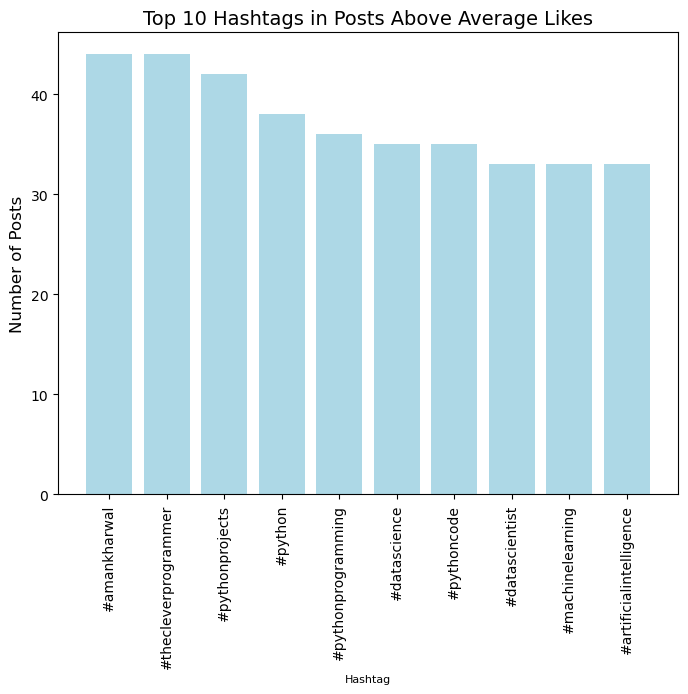

In [23]:
hashtags = [tag for tag, count in top10]
counts = [count for tag, count in top10]

plt.figure(figsize=(8,6))
plt.bar(hashtags, counts, color='lightblue')
plt.title('Top 10 Hashtags in Posts Above Average Likes', fontsize=14)
plt.xlabel('Hashtag', fontsize=8)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(rotation=90, fontsize=10) 
plt.show()

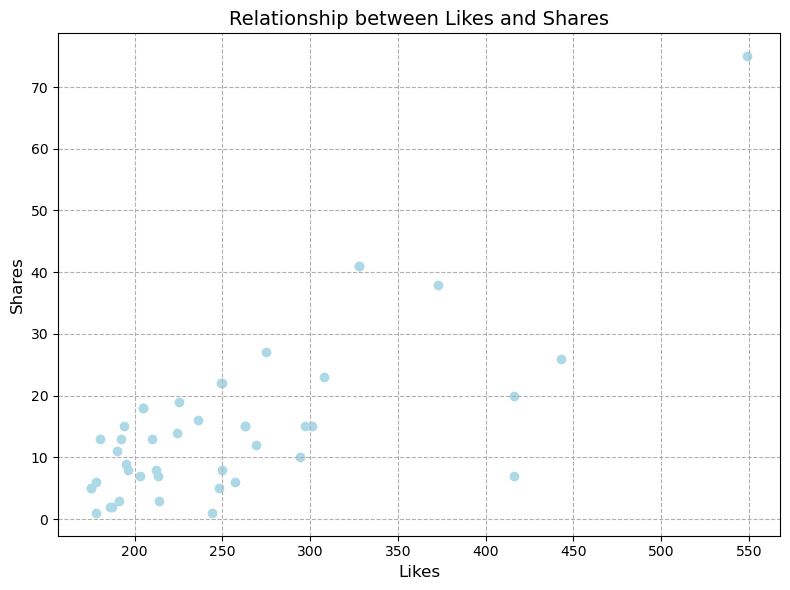

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(df['Likes'], df['Shares'], color='lightblue')
plt.title('Relationship between Likes and Shares', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Shares', fontsize=12)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

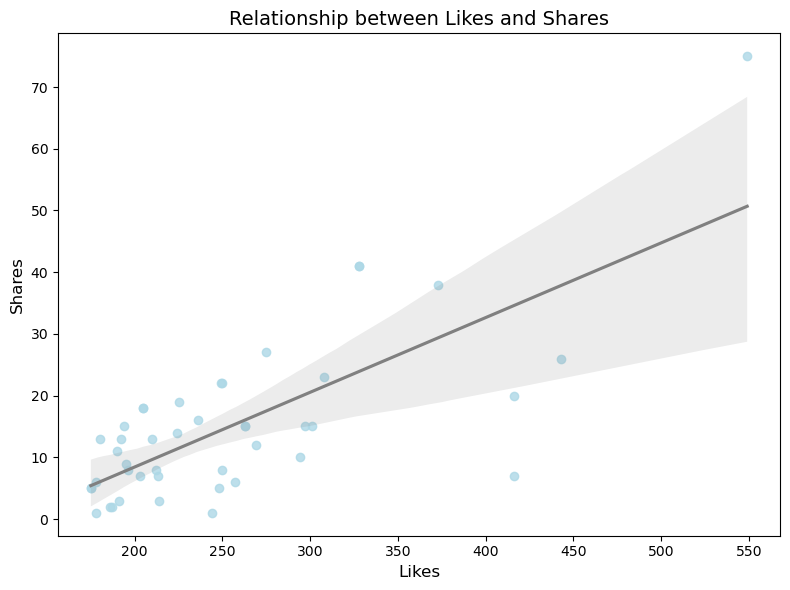

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(x='Likes', y='Shares', data=df, scatter_kws={'color':'lightblue'}, line_kws={'color':'gray'})
plt.title('Relationship between Likes and Shares', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Shares', fontsize=12)
plt.tight_layout()
plt.show()

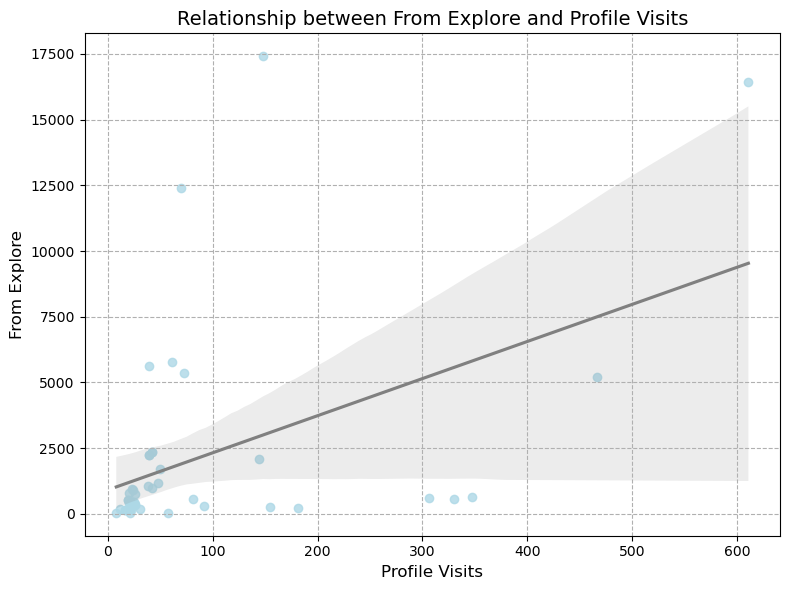

In [27]:

plt.figure(figsize=(8,6))
sns.regplot(
    x='Profile Visits', 
    y='From Explore', 
    data=df, 
    scatter_kws={'color':'lightblue'}, 
    line_kws={'color':'gray'}
)

plt.title('Relationship between From Explore and Profile Visits', fontsize=14)
plt.xlabel('Profile Visits', fontsize=12)
plt.ylabel('From Explore', fontsize=12)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


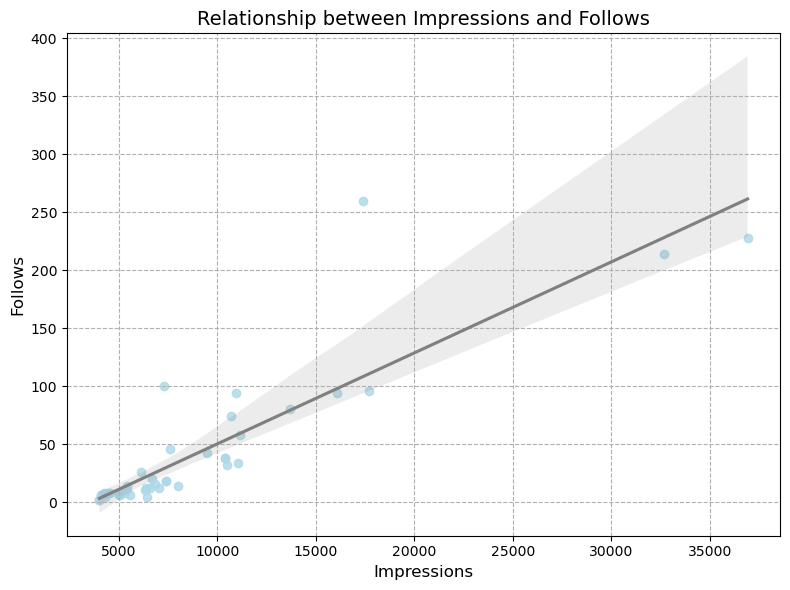

In [28]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='Impressions', 
    y='Follows', 
    data=df,
    scatter_kws={'color':'lightblue'},   
    line_kws={'color':'gray'}                    
)

plt.title('Relationship between Impressions and Follows', fontsize=14)
plt.xlabel('Impressions', fontsize=12)
plt.ylabel('Follows', fontsize=12)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

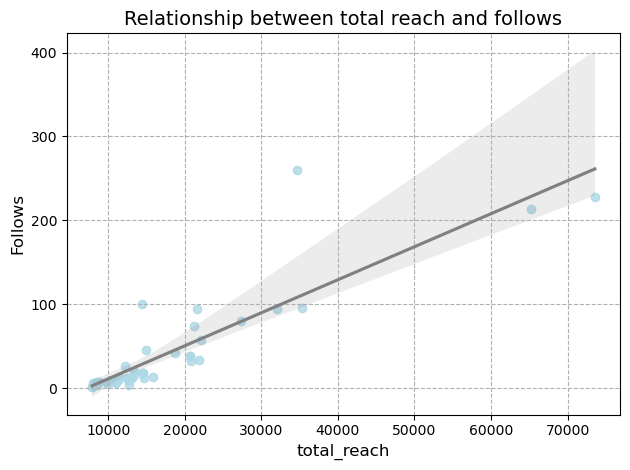

In [29]:
sns.regplot(
    x='total_reach', 
    y='Follows', 
    data=df, 
    scatter_kws={'color':'lightblue'}, 
    line_kws={'color':'gray'}
)

plt.title('Relationship between total reach and follows', fontsize=14)
plt.xlabel('total_reach', fontsize=12)
plt.ylabel('Follows', fontsize=12)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()
